In [1]:
import pandas as pd

# Load the dataset
data_path = 'day.csv'
df = pd.read_csv(data_path)

# Drop 'casual' and 'registered' columns as requested
df = df.drop(columns=['casual', 'registered'])



# Map categorical variables based on the data dictionary
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Convert the columns `season`, `weathersit`, `mnth`, and `weekday` to categorical datatype
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')



In [2]:
# Print descriptive statistics of numerical columns
print("\n Descriptive statistics of numerical columns: \n")
print(df.describe().to_markdown(numalign="left", stralign="left"))

# Print number of occurances of each unique value for the categorical columns
categorical_columns = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'season', 'weathersit']
for col in categorical_columns:
    print("\n Unique values and their frequencies for {}: \n".format(col))
    print(df[col].value_counts().rename_axis(col).reset_index(name='counts').to_markdown(index=False, numalign="left", stralign="left"))


 Descriptive statistics of numerical columns: 

|       | instant   | yr       | mnth    | holiday   | weekday   | workingday   | temp    | atemp   | hum     | windspeed   | cnt     |
|:------|:----------|:---------|:--------|:----------|:----------|:-------------|:--------|:--------|:--------|:------------|:--------|
| count | 730       | 730      | 730     | 730       | 730       | 730          | 730     | 730     | 730     | 730         | 730     |
| mean  | 365.5     | 0.5      | 6.52603 | 0.0287671 | 2.99726   | 0.683562     | 20.3193 | 23.7263 | 62.7652 | 12.7636     | 4508.01 |
| std   | 210.877   | 0.500343 | 3.45022 | 0.167266  | 2.00616   | 0.465405     | 7.50673 | 8.15031 | 14.2376 | 5.19584     | 1936.01 |
| min   | 1         | 0        | 1       | 0         | 0         | 0            | 2.42435 | 3.95348 | 0       | 1.50024     | 22      |
| 25%   | 183.25    | 0        | 4       | 0         | 1         | 0            | 13.8119 | 16.8897 | 52      | 9.04165     | 3169.75 |

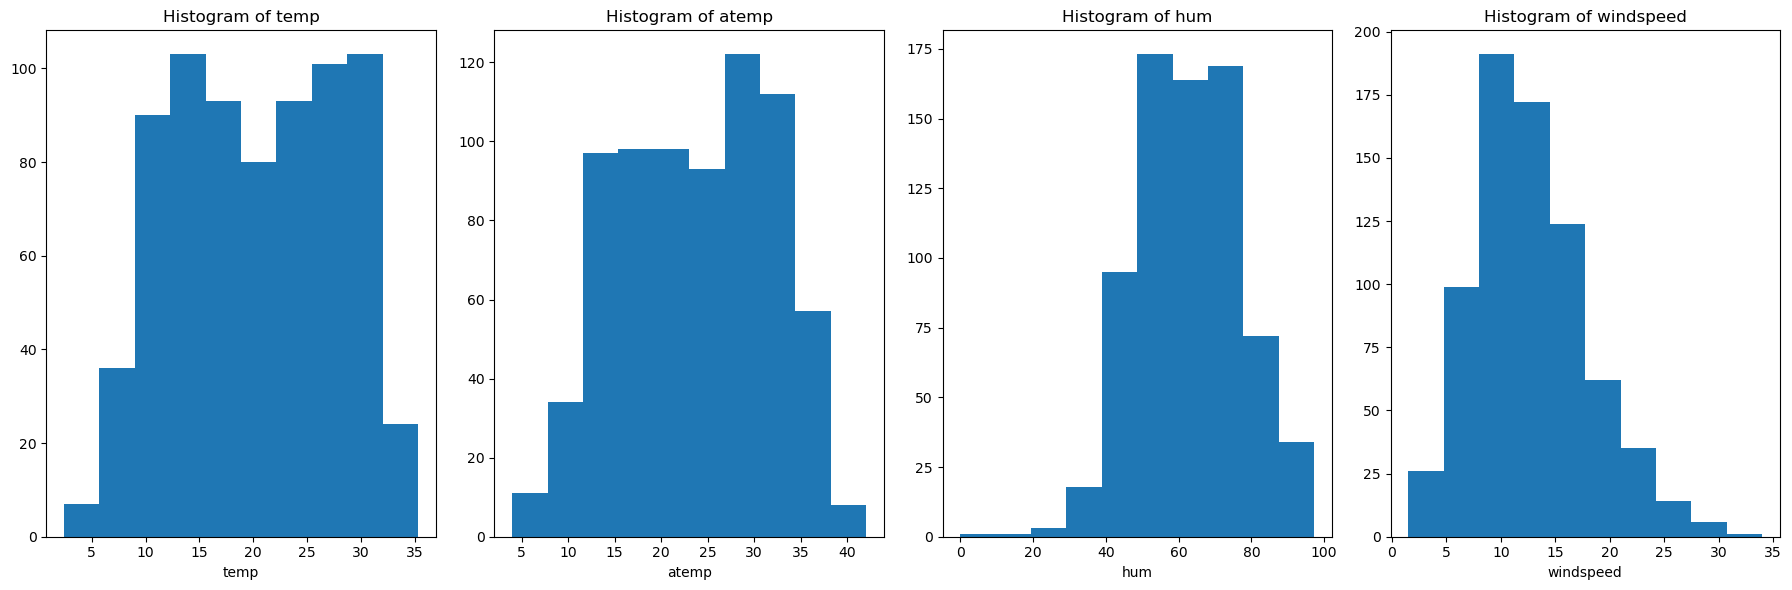

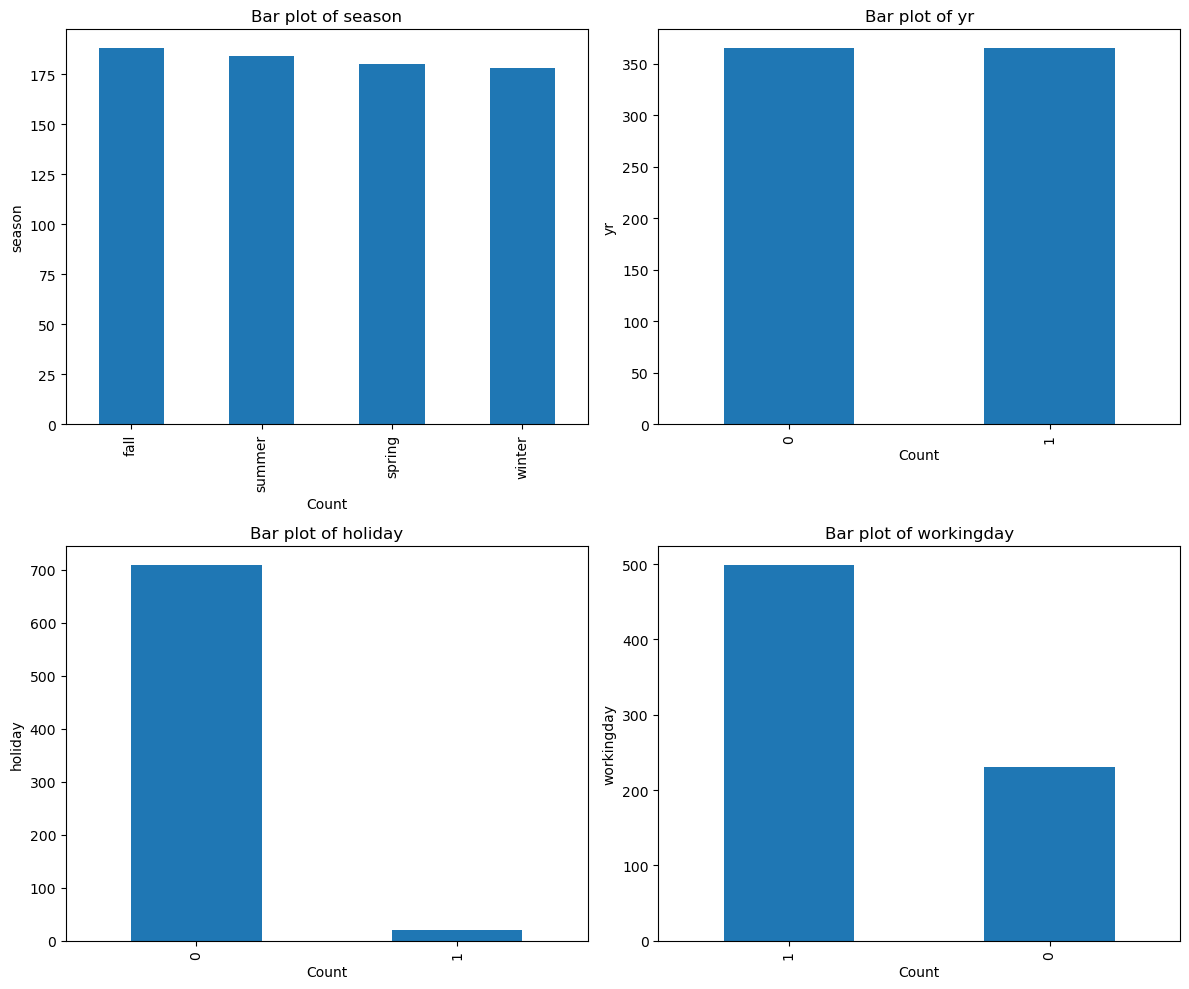

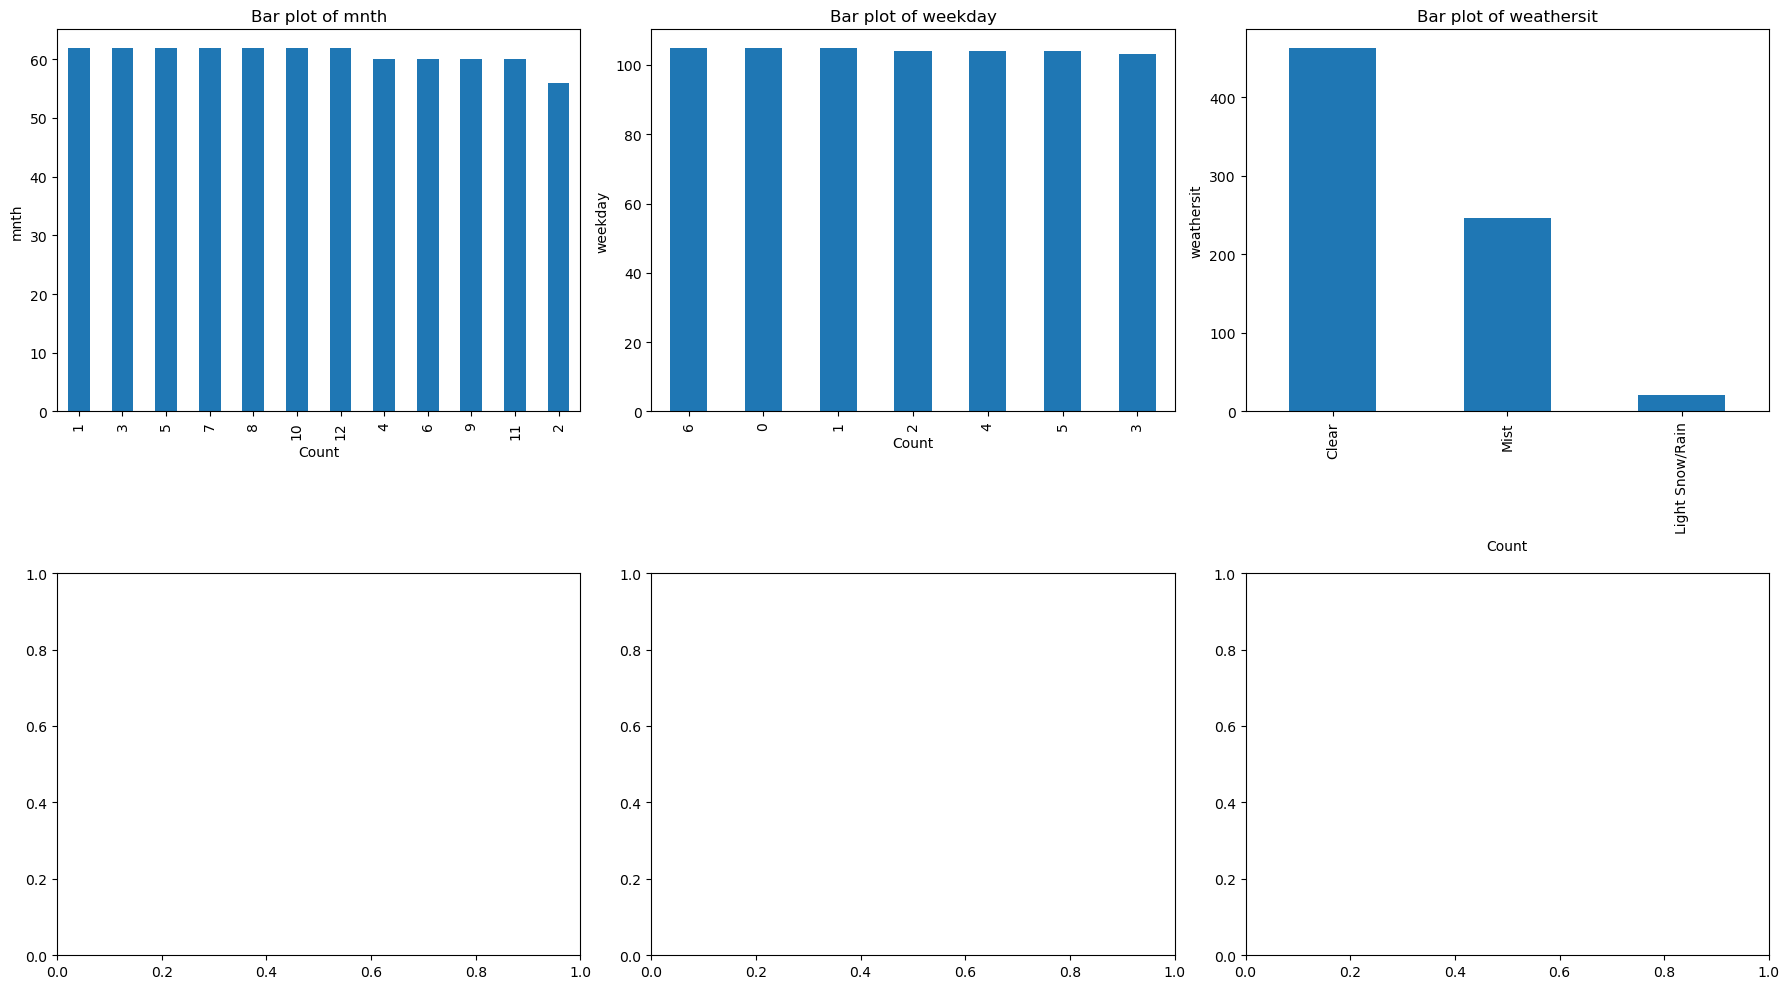

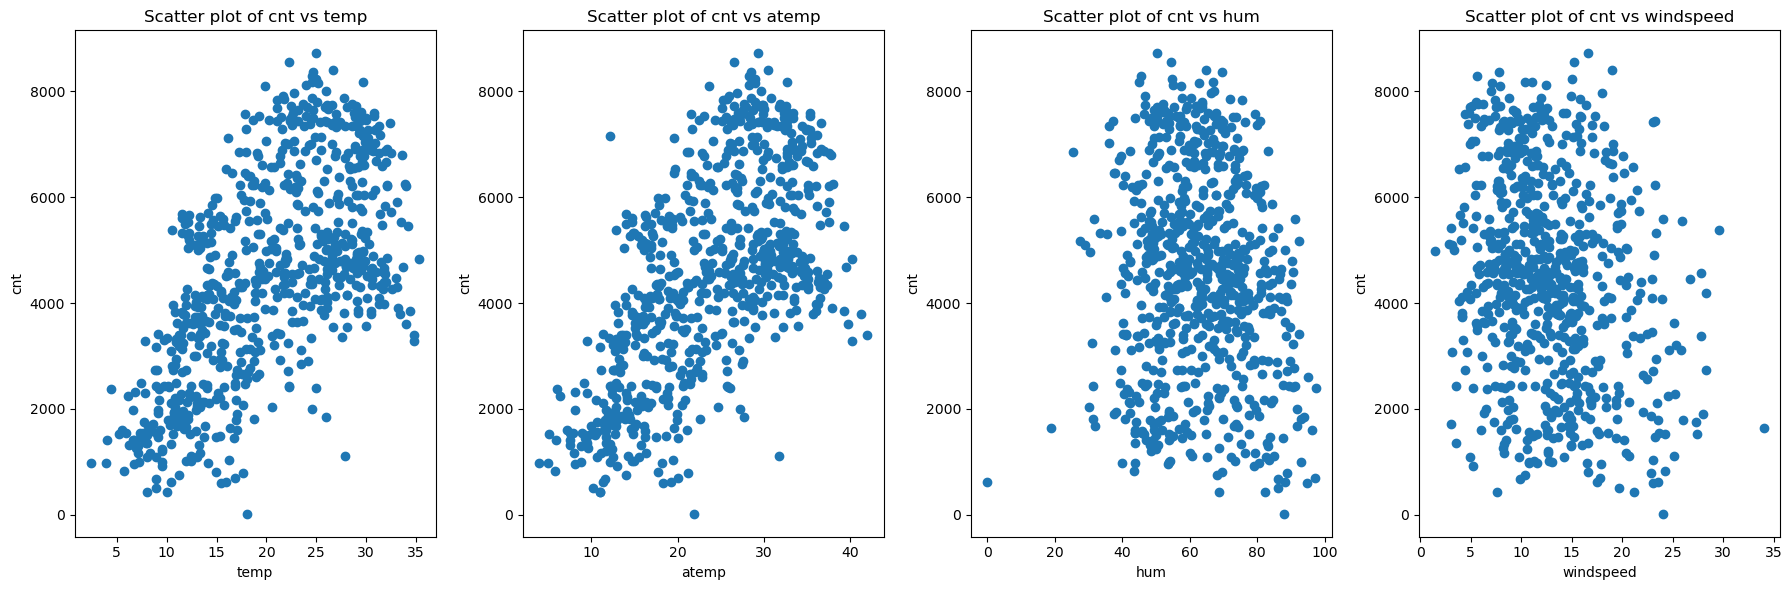

/home/alpesh/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


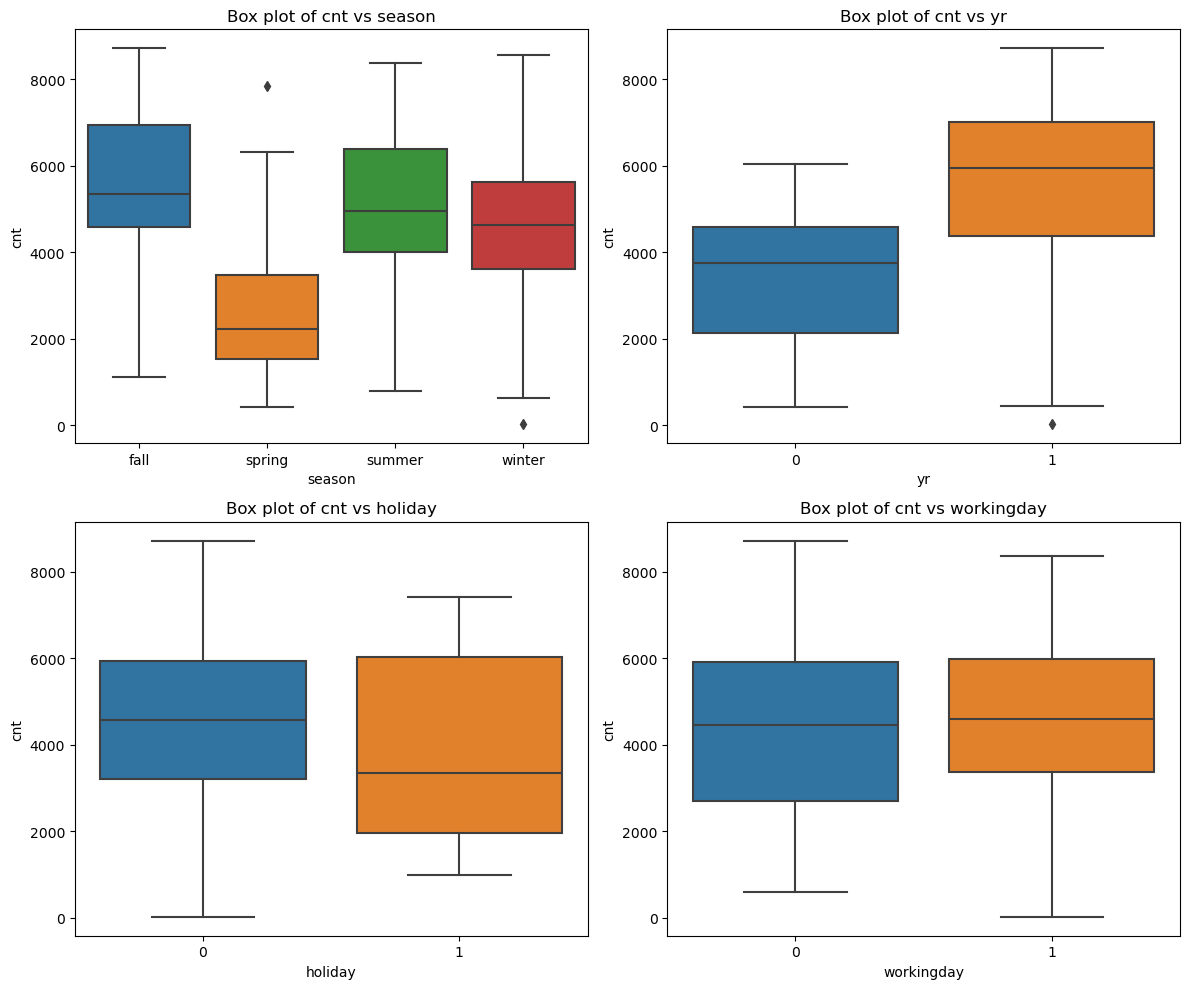

/home/alpesh/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


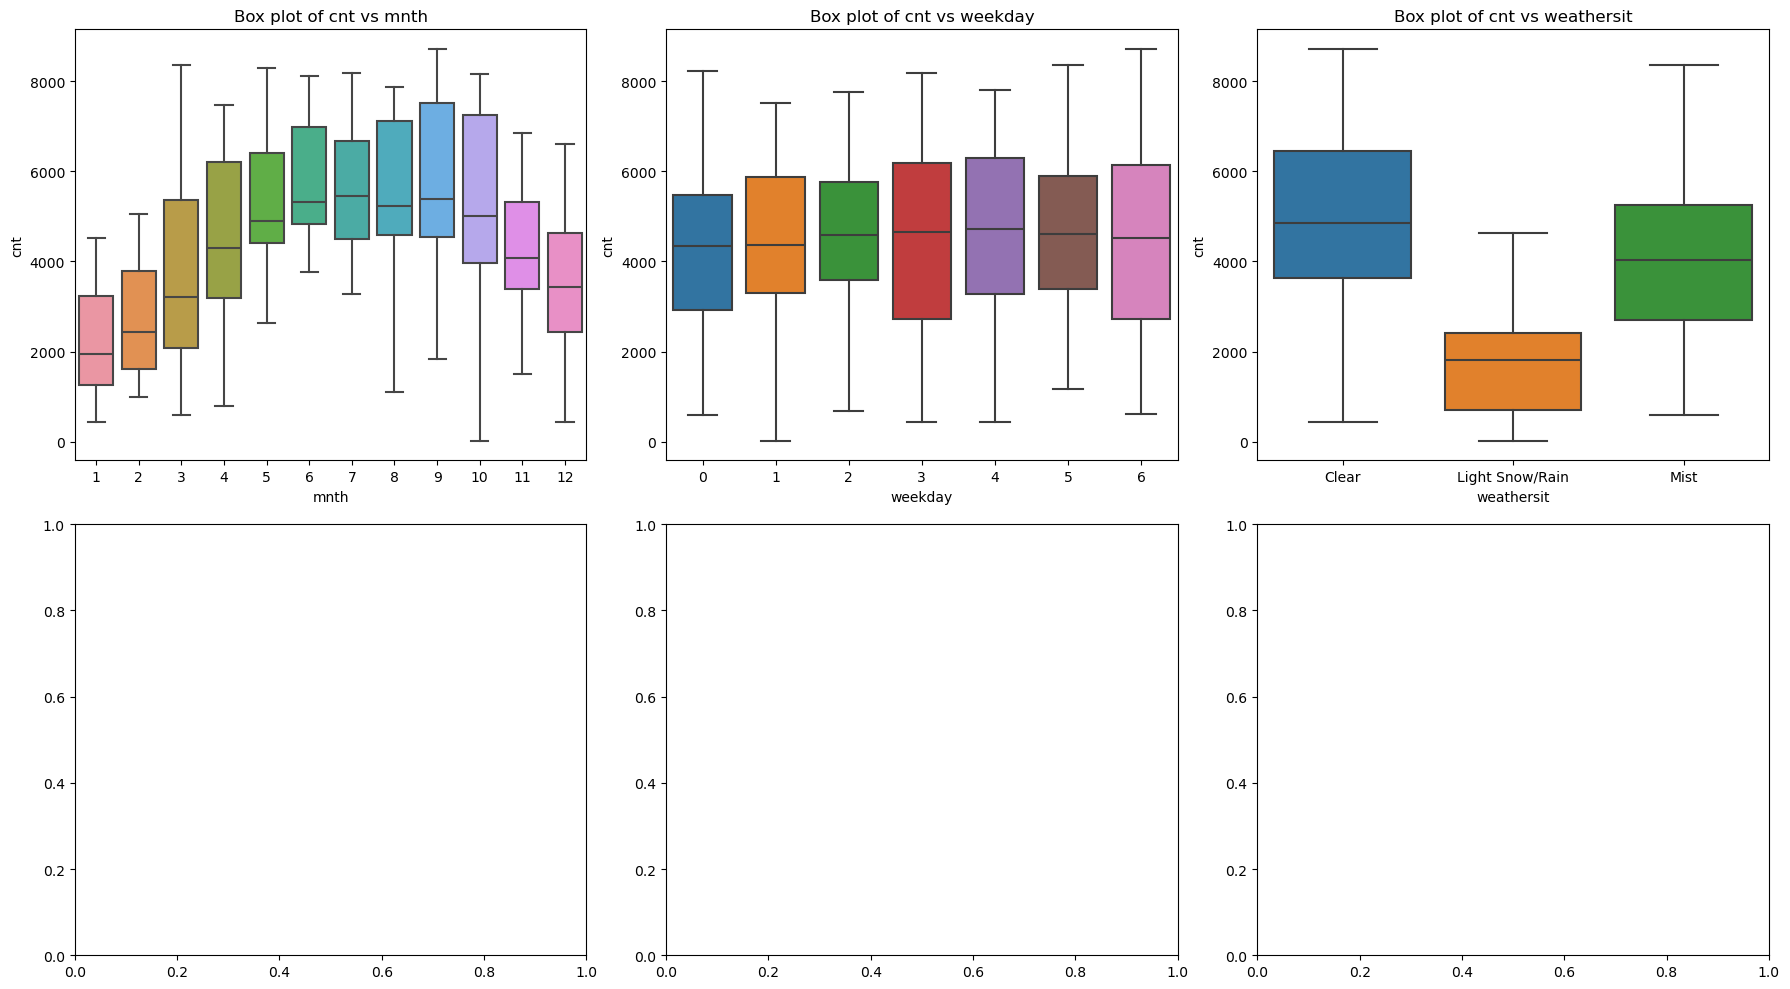

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for the columns `temp`, `atemp`, `hum`, and `windspeed`
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    axes[i].hist(df[col])
    axes[i].set_xlabel(col)
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plot bar plots for the columns `season`, `yr`, `holiday`, and `workingday`
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, col in enumerate(['season', 'yr', 'holiday', 'workingday']):
    df[col].value_counts().plot(kind='bar', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xlabel('Count')
    axes[i // 2, i % 2].set_ylabel(col)
    axes[i // 2, i % 2].set_title(f'Bar plot of {col}')
plt.tight_layout()
plt.show()

# Plot bar plots for the columns `mnth`, `weekday`, and `weathersit`
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i, col in enumerate(['mnth', 'weekday', 'weathersit']):
    df[col].value_counts().plot(kind='bar', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel('Count')
    axes[i // 3, i % 3].set_ylabel(col)
    axes[i // 3, i % 3].set_title(f'Bar plot of {col}')
plt.tight_layout()
plt.show()

# Plot scatter plots for the columns `temp`, `atemp`, `hum`, and `windspeed` with respect to the target variable `cnt`
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    axes[i].scatter(df[col], df['cnt'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('cnt')
    axes[i].set_title(f'Scatter plot of cnt vs {col}')
plt.tight_layout()
plt.show()

# Plot box plots for the columns `season`, `yr`, `holiday`, and `workingday` with respect to the target variable `cnt`
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, col in enumerate(['season', 'yr', 'holiday', 'workingday']):
    sns.boxplot(x=col, y='cnt', data=df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('cnt')
    axes[i // 2, i % 2].set_title(f'Box plot of cnt vs {col}')
plt.tight_layout()
plt.show()

# Plot box plots for the columns `mnth`, `weekday`, and `weathersit` with respect to the target variable `cnt`
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i, col in enumerate(['mnth', 'weekday', 'weathersit']):
    sns.boxplot(x=col, y='cnt', data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].set_ylabel('cnt')
    axes[i // 3, i % 3].set_title(f'Box plot of cnt vs {col}')
plt.tight_layout()
plt.show()

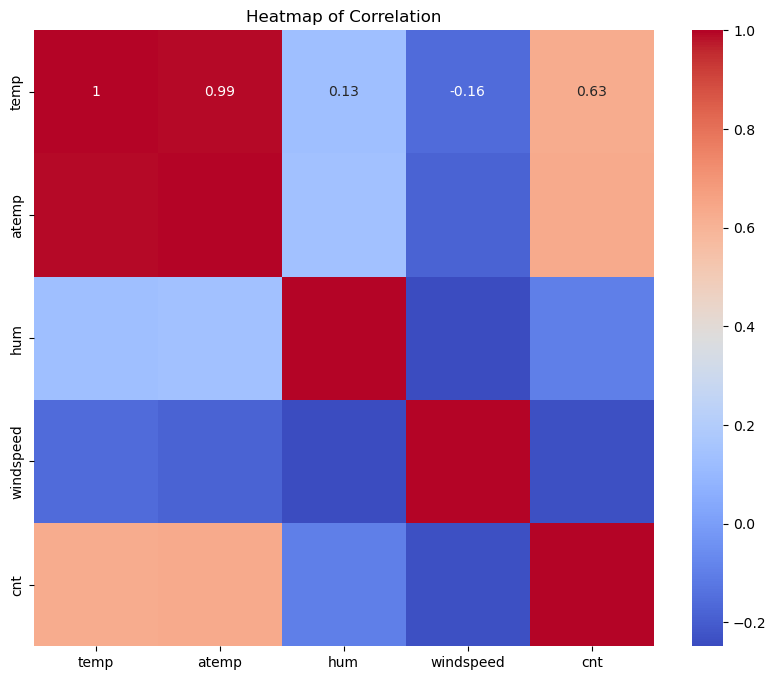

In [4]:
import seaborn as sns

# Plot a heatmap of correlation between the numerical columns `temp`, `atemp`, `hum`, `windspeed`, and `month`
plt.figure(figsize=(10, 8))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()



In [5]:
# Create dummy variables for categorical columns with more than 2 categories
#df = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)
print(df.columns)

# Splitting the data into train and test sets (80:20 split)
from sklearn.model_selection import train_test_split



# Separate the target variable and features
X = df.drop(columns=['cnt', 'instant', 'dteday'])  # Dropping 'instant' and 'dteday' as they are not useful predictors
y = df['cnt']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for further processing
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow/Rain',
       'weathersit_Mist'],
      dtype='object')


In [6]:
# Performing feature selection using RFE (Recursive Feature Elimination) with Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize linear regression model
lin_reg = LinearRegression()

# RFE model with the linear regression estimator
rfe = RFE(estimator=lin_reg, n_features_to_select=10)
rfe = rfe.fit(X_train_scaled, y_train)

# Check which features are selected
selected_features_rfe = X_train_scaled.columns[rfe.support_]
selected_features_rfe

Index(['yr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_Light Snow/Rain', 'weathersit_Mist'],
      dtype='object')

In [7]:
import statsmodels.api as sm
import numpy as np

# Resetting indices for X_train_scaled and y_train
X_train_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Adding a constant column to X_train_scaled for the intercept term in the model
X_train_sm = sm.add_constant(X_train_scaled[selected_features_rfe])

# Building the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Displaying the summary to check p-values and VIF
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.33e-202
Time:                        22:16:48   Log-Likelihood:                -4762.4
No. Observations:                 584   AIC:                             9547.
Df Residuals:                     573   BIC:                             9595.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4546.3613     35.180    129.231      0.000    4477.264    4615.459
yr                           993.2643     35.745     27.787      0.000     923.057    1063.472
weekday                      147.6942     35.391      4.173      0.000      78.182     217.206
temp                         242.7385    460.009      0.528      0.598    -660.772    1146.249
atemp                        613.0320    462.072      1.327      0.185    -294.529    1520.593
hum                         -157.8666     48.432     -3.260      0.001    -252.993     -62.740
windspeed                   -193.3994     39.109     -4.945      0.000    -270.214    -116.585
season_spring               -497.2180     57.816     -8.600      0.000    -610.775    -383.661
season_winter                192.8673     47.370      4.072      0.000      99.828     285.907
weathersit_Light Snow/Rain  -362.7829     40.798     -8.892      0.000    -442.916    -282.650
weathersit_Mist             -193.4648     44.398     -4.357      0.000    -280.668    -106.262
==============================================================================
Omnibus:                       98.144   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.999
Skew:                          -0.875   Prob(JB):                     3.44e-52
Kurtosis:                       5.584   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Remove 'temp' and refit the model
selected_features_manual = selected_features_rfe.drop('temp')

# Building the OLS model again after removing 'temp'
X_train_sm = sm.add_constant(X_train_scaled[selected_features_manual])
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Displaying the summary to check p-values and VIF
ols_summary_manual = ols_model.summary()
ols_summary_manual

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     279.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.56e-203
Time:                        22:16:48   Log-Likelihood:                -4762.6
No. Observations:                 584   AIC:                             9545.
Df Residuals:                     574   BIC:                             9589.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4546.3613     35.158    129.312      0.000    4477.307    4615.415
yr                           992.7925     35.712     27.800      0.000     922.651    1062.934
weekday                      147.8066     35.368      4.179      0.000      78.340     217.274
atemp                        854.9171     58.162     14.699      0.000     740.681     969.154
hum                         -160.6945     48.105     -3.341      0.001    -255.177     -66.212
windspeed                   -189.0144     38.192     -4.949      0.000    -264.028    -114.001
season_spring               -498.2372     57.747     -8.628      0.000    -611.659    -384.815
season_winter                188.4469     46.594      4.044      0.000      96.932     279.962
weathersit_Light Snow/Rain  -359.8021     40.380     -8.910      0.000    -439.113    -280.491
weathersit_Mist             -191.8195     44.261     -4.334      0.000    -278.752    -104.887
==============================================================================
Omnibus:                      100.320   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.126
Skew:                          -0.892   Prob(JB):                     1.61e-53
Kurtosis:                       5.609   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Final model building on the selected features
final_features = selected_features_manual

# Scaling the selected features for test data
X_test_final = X_test_scaled[final_features]

# Adding a constant to test data for prediction
X_test_final_sm = sm.add_constant(X_test_final)

# Predicting on the test set
y_pred = ols_model.predict(X_test_final_sm)

# Evaluating the model using R-squared score
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred)
r2_test

0.8478612241067034